## Simple Linear Regression
Will perform simple linear regression to predict weight based on height

Data Path: "height-weight.csv"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("height-weight.csv")

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [4]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [6]:
df["Weight"].unique()

array([ 45,  58,  48,  60,  70,  78,  80,  90,  95,  82, 105, 100,  85,
        50,  65,  76,  87,  56,  72])

In [7]:
df["Height"].unique()

array([120, 135, 123, 145, 160, 162, 163, 175, 182, 170, 176, 183, 177,
       140, 159, 150, 167, 129])

When using linear regression, it is important to see how your data is correlated

In [8]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


Both of these features have strong correlation

<Axes: >

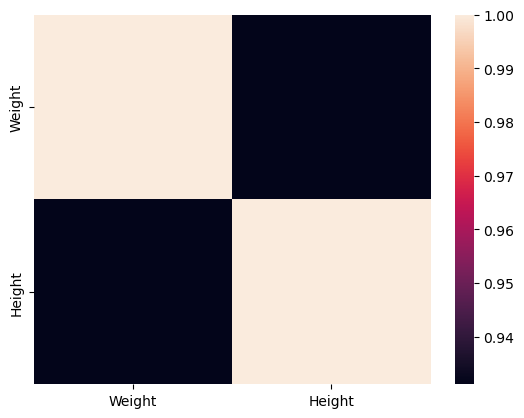

In [9]:
import seaborn as sns
sns.heatmap(df.corr())

<Axes: >

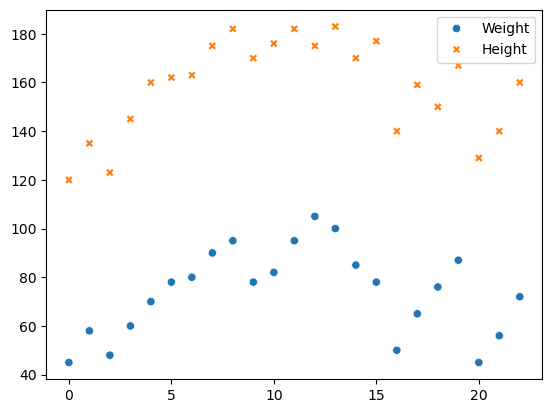

In [12]:
sns.scatterplot(df)

Text(0, 0.5, 'Height')

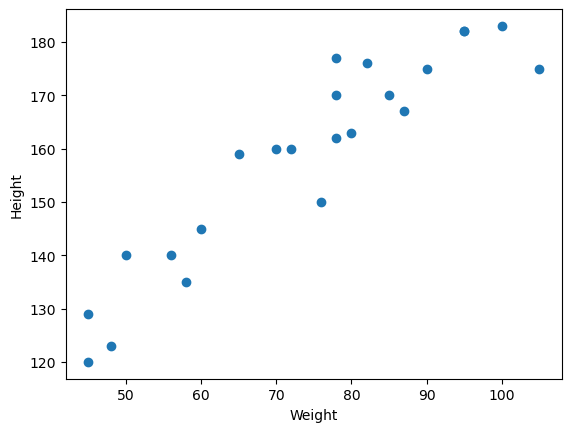

In [14]:
plt.scatter(df["Weight"], df["Height"])
plt.xlabel("Weight")
plt.ylabel("Height")

From our scatterplot we can see that as the weight increases the height also increases

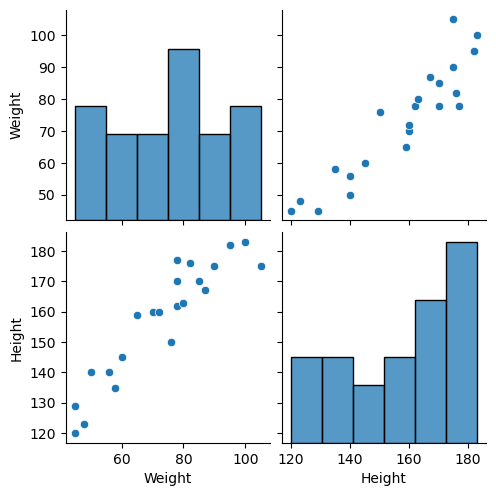

In [15]:
sns.pairplot(df)

In [16]:
df.shape

(23, 2)

In [18]:
# Creating features and labels
# The features should alwyas be either a DataFrame or 2D array
X = df[["Weight"]]
y = df["Height"]

In [19]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [20]:
#Labels can be one dimension
y = df["Height"]

Creating a traing set and test set

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [23]:
## Standardization, We now have to standarize the data before feeding it to the model 
## Making all the data share the same scale helps the model to converge faster
## We only have to standardize the features and not the labels
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)


In [24]:
# We dont not fit on the test set as we want to use the eman from the training set
# You also do not want any data leakage, i.e. you do not want you model to know anything about the test data
X_test = scaler.transform(X_test)

In [28]:
## Applying simple linear regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs = -1)

In [29]:
#Training the model
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [30]:
predictions = regression.predict(X_test)

In [31]:
predictions

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [33]:
# Getting the intercept
regression.intercept_

np.float64(156.47058823529412)

In [34]:
# getting the Coefficient/slope/gradient
# One movement in the weight values results in 17.29 movement in the height value
regression.coef_

array([17.2982057])

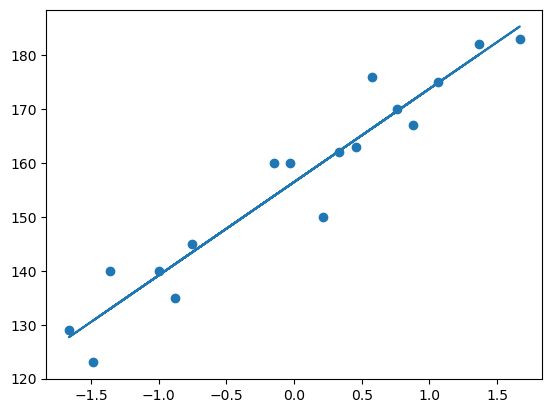

In [36]:
## Plotting the best fit line with respect to the training data
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))

In [37]:
y_pred = regression.predict(X_test)

## How linear regression is calculating y_pred
1. Predicted Height Output = intercept +coef_(Weights)
2. y_pred_test = 156.470 +17.29(X_test)

In [38]:
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [41]:
## Getting the performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"MSE: {mse} \nMAE: {mae} \nRMSE: {rmse}")

MSE: 114.84069295228699 
MAE: 9.665125886795005 
RMSE: 10.716374991212605


## R Squared
Formula: **R^2** = 1 - SSr/Sst
- **R^2** = Coefficient of determination
- **SSr** = Sum of squares of residuals
- **SSt** = Total sum of squares

In [42]:
# Will calculate the R^2 metric
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(f"R^2 Scored: {score}")

R^2 Scored: 0.7360826717981276


## Adjusted R Squared 
Formula: 1 - [(1 - R^2) * (n - 1) * (n - k - 1)]
- **R^2** = The R Squared of the model
- **n** = The number of observations
- **k** = The number of predictor variables

In [43]:
# Calculating the adjusted R^2
adjusted_score = 1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print(f"Ajusted R Squared: {adjusted_score}")

Ajusted R Squared: 0.6701033397476595


## Ols Linear Regression
We will now use ols linear regression to see if we get the same output as the gradient descent linear regression

In [45]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()

In [46]:
ols_pred = model.predict(X_test)

In [47]:
ols_pred

array([  5.79440897,   5.79440897, -28.78711691,  23.60913442,
        -7.82861638,  34.08838469])

In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Mon, 22 Dec 2025   Prob (F-statistic):                       0.664
Time:                        15:30:53   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            17.2982     39.138      0.442      0.664     -65.671     100.267
==============================================================================
Omnibus:                        0.135   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.935   Jarque-Bera (JB):                0.203
Skew:                          -0.166   Prob(JB):                        0.904
Kurtosis:                       2.581   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## How to handle new data being fed to you model


In [50]:
regression.predict(scaler.transform([[72]]))

/home/frentr/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])